In [25]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from shutil import copyfile
import os
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adamax

In [27]:
import os
# Set the path to your dataset directory
dataset_path = r"C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set"
# Walk through the directory and print the directory names
for dirName, _, fileNames in os.walk(dataset_path):
    print(dirName)

C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set
C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets
C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets\colon_aca
C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets\colon_aca\.ipynb_checkpoints
C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets\colon_n
C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\lung_image_sets
C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\lung_image_sets\lung_aca
C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\lung_image_sets\lung_n
C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\lung_image_sets\lung_scc


In [29]:
import os

# Set the path to your dataset directory
dataset_path = r"C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set"
# Walk through the directory and print the directory names
for dirName, _, fileNames in os.walk(dataset_path):
    count = 0
    print("Directory:", dirName)
    
    # Optionally, you can count the number of files in the directory
    count = len(fileNames)
    print("Number of files in this directory:", count)


Directory: C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set
Number of files in this directory: 0
Directory: C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets
Number of files in this directory: 0
Directory: C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets\colon_aca
Number of files in this directory: 5000
Directory: C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets\colon_aca\.ipynb_checkpoints
Number of files in this directory: 1
Directory: C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets\colon_n
Number of files in this directory: 5000
Directory: C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\lung_image_sets
Number of files in this directory: 0
Directory: C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\lung_image_sets\lung_aca
Number of files in this directory: 5000
Directory: C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\lung_image_sets\lung_n
Number of files in this directory: 5000
Directory: C:\Users\ASUS\LUNGS CANCER\lun

In [47]:
def class_countPlot(datasets):
    # Check if 'datasets' is not a list and convert it to a list if needed
    if not isinstance(datasets, list):
        datasets = [datasets]  # Wrap it in a list
        
    class_counts = {}
    
    if datasets:
        for dataset in datasets:
            for folder in os.listdir(dataset):
                folder_path = os.path.join(dataset, folder)
                if os.path.isdir(folder_path):
                    files = os.listdir(folder_path)
                    images_count = len(files)
                    class_counts[folder] = images_count
                    
                else:
                    print(f"Folder {folder_path} does not exist.")

        # plotting the counts of each class
        class_names = list(class_counts.keys())
        counts = list(class_counts.values())
        
        # Get a colormap  
        cmap = plt.get_cmap("tab10")  # Choose a colormap (you can change 'viridis' to any other)  
        # Create a color for each count based on the colormap  
        colors = [cmap(i / len(counts)) for i in range(len(counts))]
        
        plt.figure(figsize=(10, 6))  
        plt.bar(class_names, counts, color= colors)  
        plt.xlabel('Classes')  
        plt.ylabel('Number of Images')  
        plt.title('Count of Images in Each Class')  
        plt.xticks(rotation=45)  
        plt.grid(axis='y')  
        
        # Show the plot  
        plt.tight_layout()  
        plt.show() 
        
    else:
        print("Warning: dataset(s) empty!!")

In [49]:
def split_data(source, training, testing, split_size):
    # Ensure the destination directories exist
    os.makedirs(training, exist_ok=True)
    os.makedirs(testing, exist_ok=True)

    for folder in os.listdir(source):
        files = []
        folder_path = os.path.join(source, folder)
        
        # Create subdirectories for training and testing classes
        os.makedirs(os.path.join(training, folder), exist_ok=True)
        os.makedirs(os.path.join(testing, folder), exist_ok=True)

        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if os.path.getsize(file_path) > 0:
                files.append(file)
            else:
                print(f"{file} has not enough pixels to represent it as an image, seems corrupted so ignoring.")

        training_length = int(len(files) * split_size)
        testing_length = len(files) - training_length

        # Shuffle and split files
        training_set = shuffle(files[:training_length])
        testing_set = shuffle(files[training_length:])

        # Copy files to the training set
        for file in training_set:
            file_path = os.path.join(folder_path, file)
            destination_path = os.path.join(training, folder, file)
            copyfile(file_path, destination_path)

        # Copy files to the testing set
        for file in testing_set:
            file_path = os.path.join(folder_path, file)
            destination_path = os.path.join(testing, folder, file)
            copyfile(file_path, destination_path)

In [51]:
def plot_accuracy_loss(history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], label = "train")
    plt.plot(history.history['val_accuracy'], label = "validataion")
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend(loc = 'upper left')

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend(loc = 'upper left')
    plt.show()

In [53]:
optimizer = Adamax(learning_rate=0.001)
epochs = 100
img_size = (200, 200)
batch_size = 256
split_size = 0.8

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    patience=10, 
    restore_best_weights=True
)

# ModelCheckpoint callback to save the best model weights  
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "DenseNet_noTop_MRI.keras",  # Path to save the model weights
    monitor='val_accuracy',       # Which metric to monitor  
    save_best_only=True,         # Save only the best model  
    mode='max',                  # We want to maximize the monitored metric  
    verbose=1                    # Print a message when the model
)

# Source directories (update these paths according to your local setup)
COLON_SOURCE_DIR = r"C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\colon_image_sets"
LUNG_SOURCE_DIR = r"C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\lung_image_sets"
TRAINING_DIR = r"C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\training"
TESTING_DIR = r"C:\Users\ASUS\LUNGS CANCER\lung_colon_image_set\testing"
DESTINATION = r"C:\Users\ASUS\LUNGS CANCER"  # Destination for any outputs

In [55]:
datasets = [COLON_SOURCE_DIR, LUNG_SOURCE_DIR]

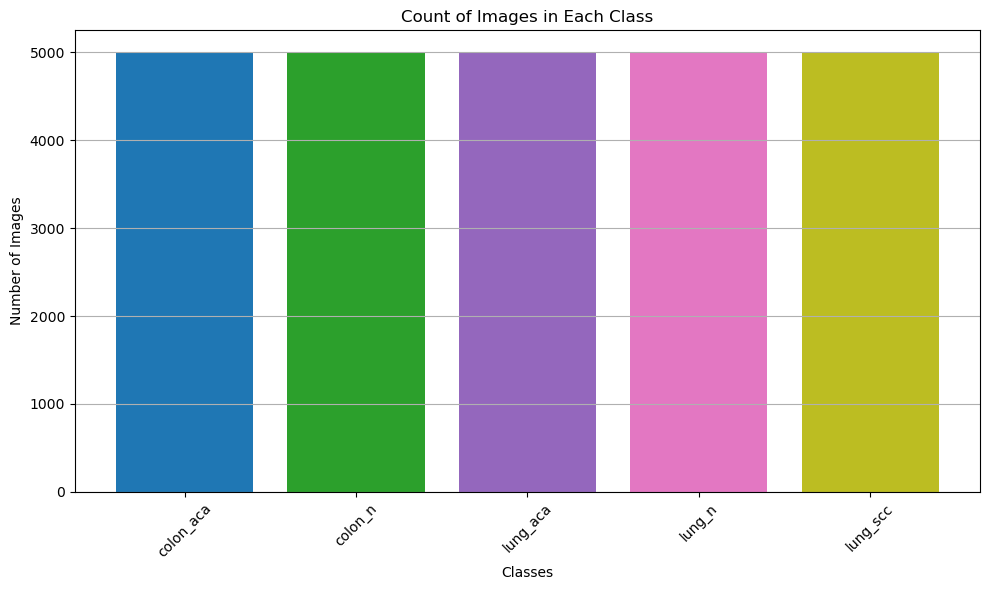

In [57]:
class_countPlot(datasets)

In [59]:
split_data(COLON_SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)
split_data(LUNG_SOURCE_DIR, TRAINING_DIR, TESTING_DIR, split_size)

.ipynb_checkpoints has not enough pixels to represent it as an image, seems corrupted so ignoring.


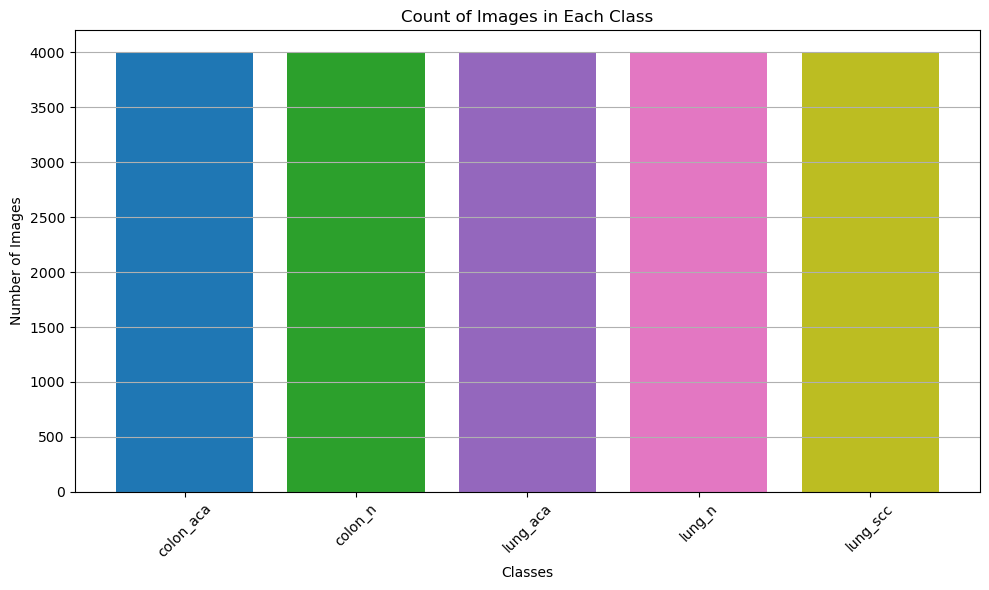

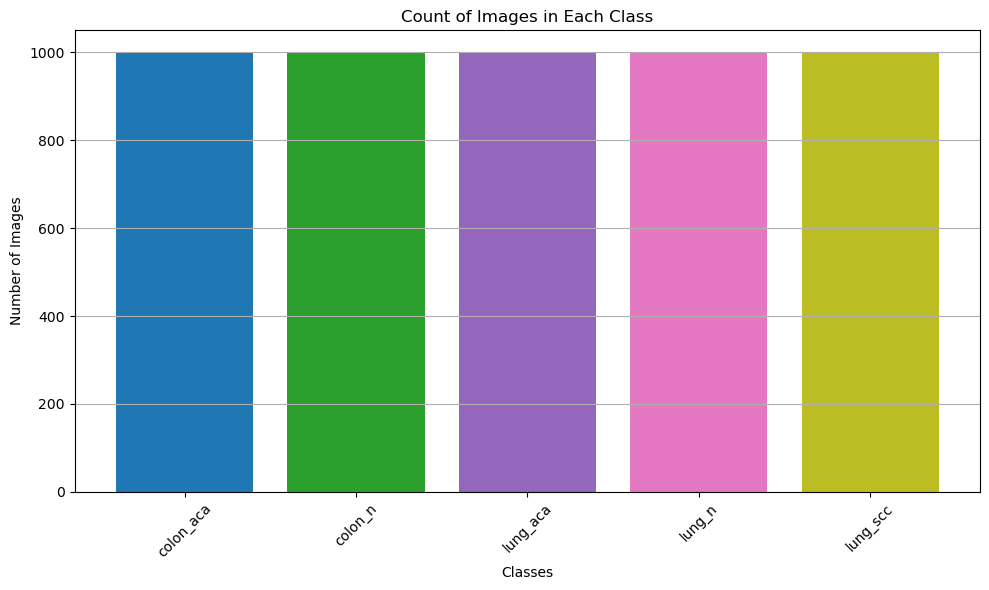

(None, None)

In [61]:
class_countPlot(TRAINING_DIR), class_countPlot(TESTING_DIR)

In [64]:
# Make datagen for Train generator
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Train generator
train_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                    target_size = img_size,
                                                    batch_size = batch_size,
                                                    shuffle = True,
                                                    class_mode = "categorical",
                                                    color_mode = "rgb",
                                                    subset = "training"
                                                   )

# validation generator
validation_generator = train_datagen.flow_from_directory(TRAINING_DIR, 
                                                         target_size = img_size,
                                                         batch_size = batch_size,
                                                         shuffle = False,
                                                         class_mode = "categorical",
                                                         color_mode = "rgb",
                                                         subset = "validation"
                                                        )
# Test generator
test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  target_size = img_size,
                                                  batch_size = batch_size,
                                                  shuffle = False,
                                                  class_mode = "categorical",
                                                  color_mode = "rgb",
                                                 )

Found 16000 images belonging to 5 classes.
Found 4000 images belonging to 5 classes.
Found 5000 images belonging to 5 classes.


In [66]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())

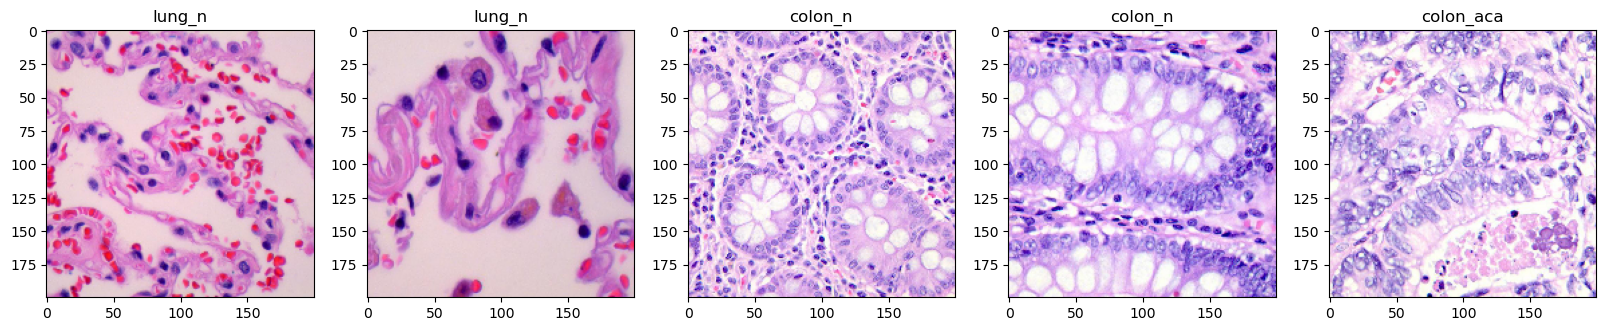

In [68]:
fig, axs = plt.subplots(1, 5, figsize = (20, 4))
axs = axs.flatten()
train_batch = next(train_generator)

for i ,ax in enumerate(axs):
    ax.imshow(train_batch[0][i])
    label = tf.argmax(train_batch[1][i])
    ax.set_title(class_names[label])
plt.show()

In [70]:
base_model = tf.keras.applications.DenseNet121(weights = "imagenet", include_top = False, pooling = "avg", input_shape = (img_size[0], img_size[1], 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


In [72]:
base_model.trainable = False

In [74]:
model = base_model.output
model = tf.keras.layers.BatchNormalization()(model)
model = tf.keras.layers.Dropout(0.5)(model)
model = tf.keras.layers.Dense(5, activation = "softmax")(model)
model = tf.keras.models.Model(inputs = base_model.input, outputs = model)

In [76]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 200, 200, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d                │ (None, 206, 206, 3)       │               0 │ input_layer_1[0][0]        │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 100, 100, 64)      │           9,408 │ zero_padding2d[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 100, 100, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 100, 100, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ zero_padding2d_1              │ (None, 102, 102, 64)      │               0 │ conv1_relu[0][0]           │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1 (MaxPooling2D)          │ (None, 50, 50, 64)        │               0 │ zero_padding2d_1[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_bn             │ (None, 50, 50, 64)        │             256 │ pool1[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_relu           │ (None, 50, 50, 64)        │               0 │ conv2_block1_0_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 50, 50, 128)       │           8,192 │ conv2_block1_0_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 50, 50, 128)       │             512 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 50, 50, 128)       │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 50, 50, 32)        │          36,864 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_concat           │ (None, 50, 50, 96)        │               0 │ pool1[0][0],               │
│ (Concatenate)                 │                           │               

 Total params: 7,046,725 (26.88 MB)

 Trainable params: 7,173 (28.02 KB)

 Non-trainable params: 7,039,552 (26.85 MB)

In [78]:
model.compile(optimizer, loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
history = model.fit(x= train_generator,
                    epochs= epochs,
                    verbose= 1,
                    validation_data= validation_generator,
                    callbacks= [early_stopping, model_checkpoint]
                    )

C:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.5571 - loss: 1.2160 
Epoch 1: val_accuracy improved from -inf to 0.88300, saving model to DenseNet_noTop_MRI.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 853s 13s/step - accuracy: 0.5599 - loss: 1.2085 - val_accuracy: 0.8830 - val_loss: 0.5463
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8905 - loss: 0.3135
Epoch 2: val_accuracy improved from 0.88300 to 0.93275, saving model to DenseNet_noTop_MRI.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 627s 10s/step - accuracy: 0.8906 - loss: 0.3131 - val_accuracy: 0.9327 - val_loss: 0.3377
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9207 - loss: 0.2355
Epoch 3: val_accuracy improved from 0.93275 to 0.94625, saving model to DenseNet_noTop_MRI.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 621s 10s/step - accuracy: 0.9208 - loss: 0.2354 - val_accuracy: 0.9463 - val_loss: 0.2413
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.9269 - loss: 0.2080
Epoch 4: val_accuracy i

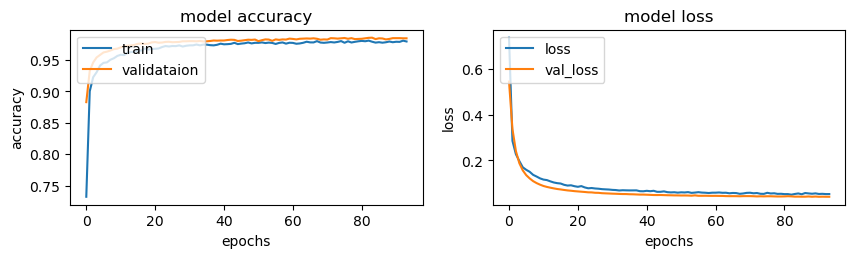

In [ ]:
 plot_accuracy_loss(history)

In [84]:
model.load_weights("DenseNet_noTop_MRI.keras")

In [86]:
model.evaluate(test_generator)[1]

20/20 ━━━━━━━━━━━━━━━━━━━━ 170s 8s/step - accuracy: 0.9933 - loss: 0.0204


0.9879999756813049

In [88]:
# Make predictions  
predictions = model.predict(test_generator)  

# If you want to extract class indices based on expectations  
predicted_classes = tf.argmax(predictions, axis=-1)  # Get predicted class indices

20/20 ━━━━━━━━━━━━━━━━━━━━ 143s 7s/step


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1000
           1       1.00      1.00      1.00      1000
           2       0.98      0.96      0.97      1000
           3       1.00      1.00      1.00      1000
           4       0.96      0.98      0.97      1000

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



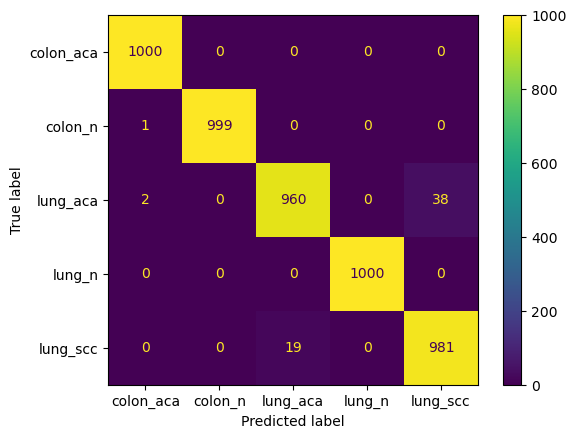

In [90]:
true_classes = test_generator.classes

print("Classification Report:")  
print(classification_report(true_classes, predicted_classes)) 

cm = confusion_matrix(true_classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = class_names)
disp.plot()